In [22]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp
import jax
import jax.random as jr
import jax.numpy as jnp

theme, cs = rp.mpl_setup(False)

In [23]:
xx = jnp.tanh(jnp.linspace(-3, 3, 1000))
n_basis = 6
nn = jnp.arange(n_basis).reshape(-1, 1)

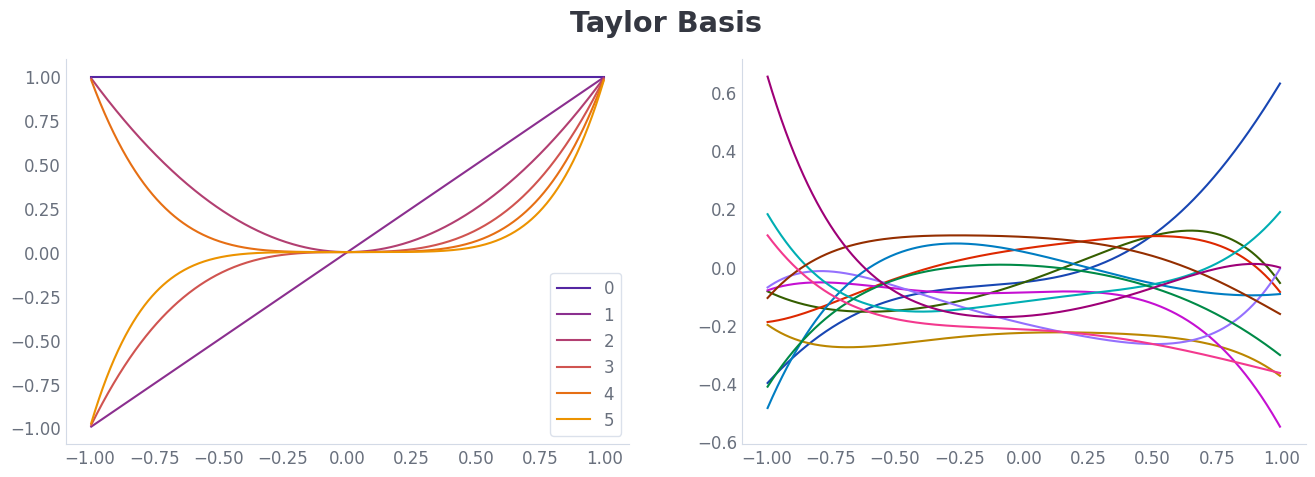

In [24]:
def plot_basis(dm, n_samples=12, title='Basis'):
    n_basis = dm.shape[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    colors = sns.color_palette('rho_inferna', n_basis)
    for i, yy, color in zip(range(dm.shape[0]), dm, colors):
        ax1.plot(xx, yy, color=color, label=f'{i}')
    # rp.line_labels(ax1)
    ax1.legend()

    coefs = jr.normal(jr.PRNGKey(1), (n_samples, n_basis)) / n_basis
    for yy in coefs @ dm:
        ax2.plot(xx, yy)

    fig.suptitle(title)
    return fig

taylor = xx ** nn

fig = plot_basis(taylor, title='Taylor Basis')

In [25]:
(xx ** nn).shape

(6, 1000)

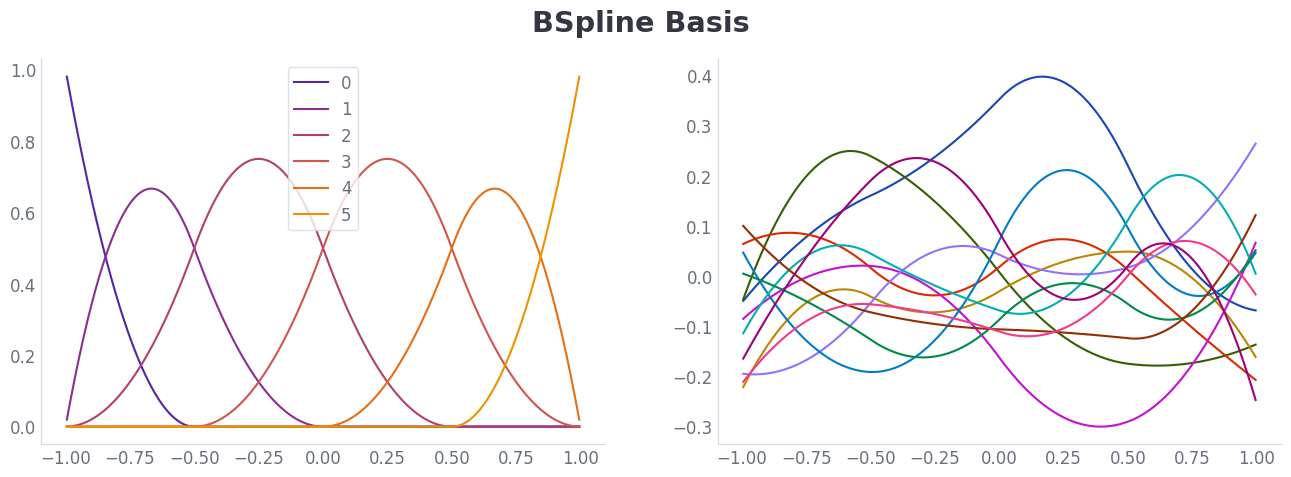

In [26]:
from scipy.interpolate import BSpline

bspl = BSpline.design_matrix(xx, jnp.array([-1, -1, -1, -0.5, 0, 0.5, 1, 1, 1]), k=2).todense().T

fig = plot_basis(bspl, title='BSpline Basis')

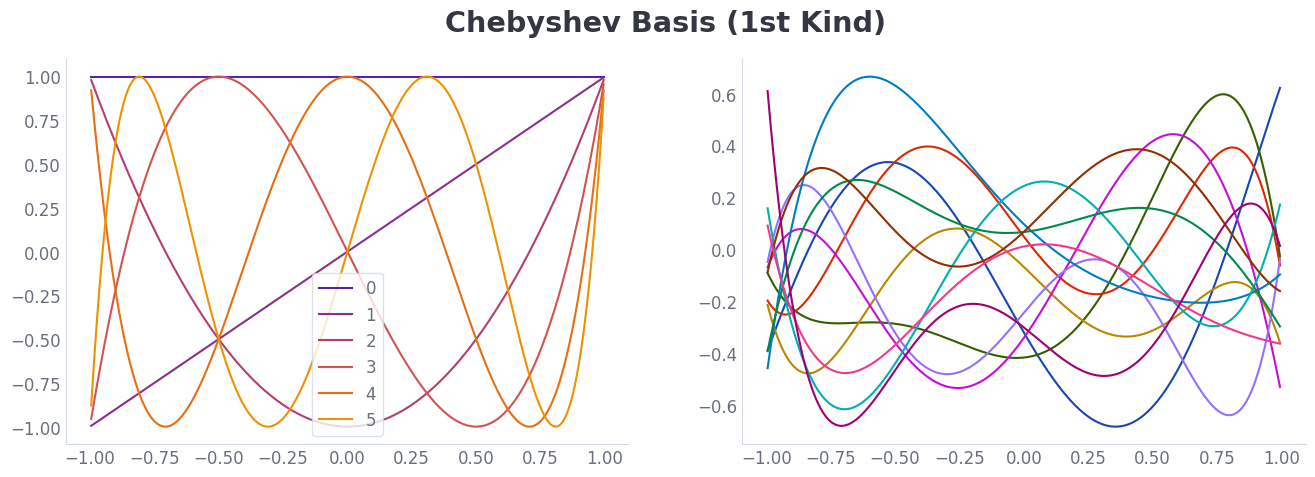

In [27]:
from scipy import special

cheby1 = special.eval_chebyt(nn, xx)

fig = plot_basis(cheby1, title='Chebyshev Basis (1st Kind)')

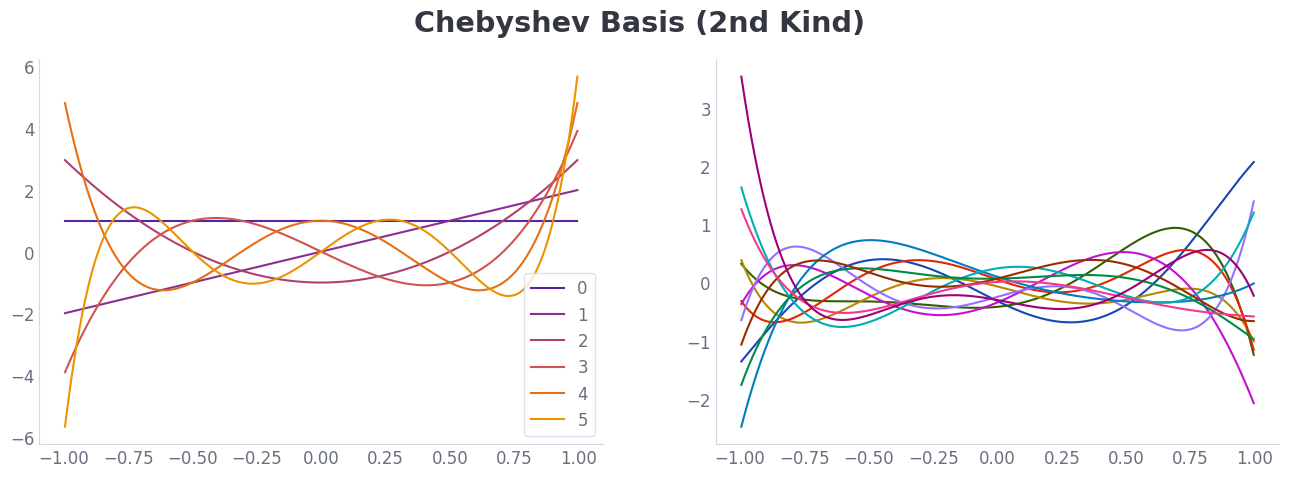

In [28]:
cheby2 = special.eval_chebyu(nn, xx)

fig = plot_basis(cheby2, title='Chebyshev Basis (2nd Kind)')

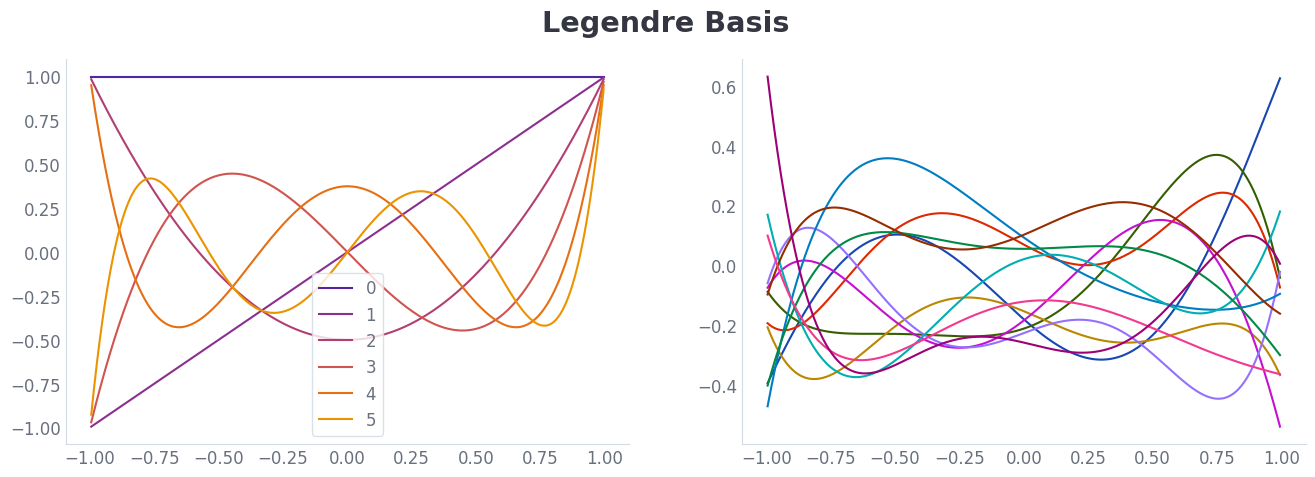

In [29]:
legendre = special.eval_legendre(nn, xx)

fig = plot_basis(legendre, title='Legendre Basis')

In [34]:
r = range(4)

def rg(i):
    yield from range(i)

r = rg(4)

print(next(r), next(r))

0 1


In [21]:
from ipywidgets import interact

def jacobi_scale2(alpha, beta, nn):
    # https://www.wikiwand.com/en/Jacobi_polynomials#Orthogonality
    num1 = 2 ** (alpha + beta + 1)
    den1 = (2 * nn + alpha + beta + 1)

    G = special.gamma

    num2 = G(nn + alpha + 1) * G(nn + beta + 1)
    den2 = G(nn + alpha + beta + 1) * special.factorial(nn)

    return np.sqrt(num1 / den1 * num2 / den2)

def jacobi_scale(alpha, beta, nn):
    return special.binom(nn + alpha, nn)

@interact(alpha=(-1, 5, 0.01), beta=(-1, 5, 0.1))
def plot_jacobi_basis(alpha, beta):
    plot_basis(special.eval_jacobi(nn, alpha, alpha, xx) / special.eval_jacobi(nn, alpha, alpha, jnp.ones_like(xx)),
               title=f'Jacobi Basis (α = {alpha:.3f}, β = {beta:.3f})')

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
def gegenbauer_scale(alpha, nn):
    return ((np.pi * 2 ** (1 - 2 * alpha) * special.gamma(nn + 2 * alpha)) /
            (special.factorial(nn) * (nn + alpha) + special.gamma(alpha) ** 2))

@interact(alpha=(0, 2, 0.01))
def plot_gegenbauer_basis(alpha):
    basis = special.eval_gegenbauer(nn, alpha, xx)
    plot_basis(basis / (1e-12 + basis.max(axis=1, keepdims=True)),
               title=f'Gegenbauer Basis (α = {alpha:.3f})')

interactive(children=(FloatSlider(value=1.0, description='alpha', max=2.0, step=0.01), Output()), _dom_classes…